In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')
df

,milesTravelled,numdeliveries,gasPrice,traveltime
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


# correlation b/w columns
1. using seaborn
2. using pandas
3. using statsmodels 

<AxesSubplot:xlabel='milesTravelled', ylabel='traveltime'>

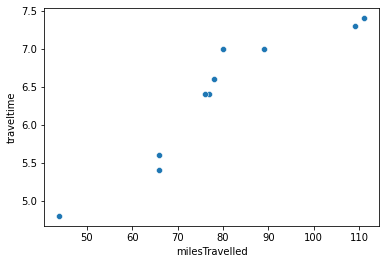

In [3]:
sns.scatterplot(x = 'milesTravelled', y= 'traveltime', data=df)

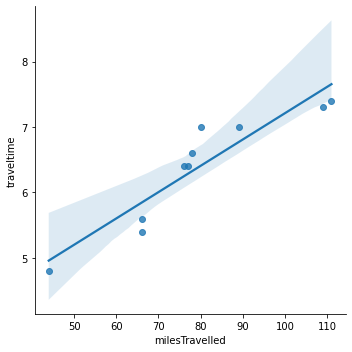

In [4]:
sns.lmplot(x = 'milesTravelled', y= 'traveltime', data= df)

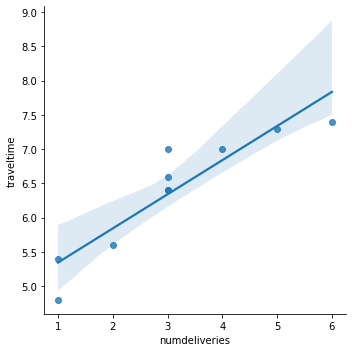

In [5]:
sns.lmplot(x = 'numdeliveries', y='traveltime',data=df)

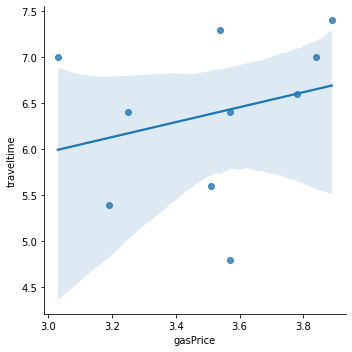

In [6]:
sns.lmplot(x = 'gasPrice', y = 'traveltime', data=df)           # independent vs dependent graph

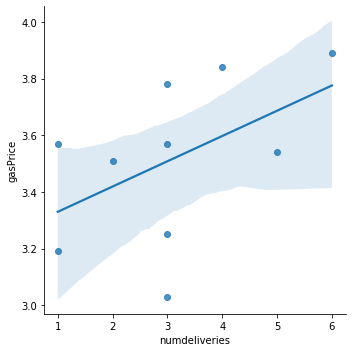

In [7]:
sns.lmplot(x= 'numdeliveries', y= 'gasPrice', data=df)

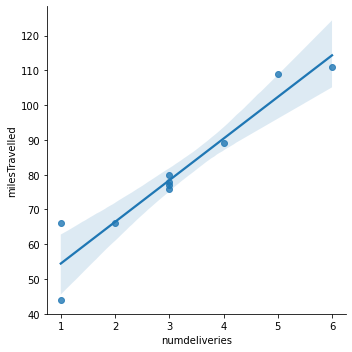

In [8]:
sns.lmplot(y='milesTravelled', x= 'numdeliveries', data=df)           # multicollinearity

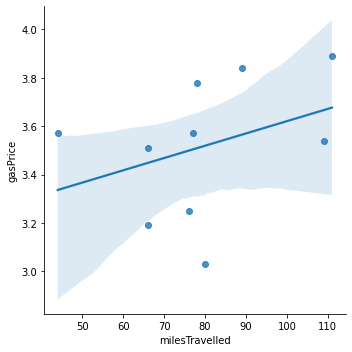

In [9]:
sns.lmplot(x='milesTravelled', y= 'gasPrice', data=df)

*conclusion*
- numdeliveries is positively correlated to traveltime
- milesTravelled is positively correlated to traveltime
- gasPrice is not correleated 
- milesTravelled and numdeliveries are positivity correlated and create 

In [10]:
df.corr()                          # its range always between (0 to 1) 

,milesTravelled,numdeliveries,gasPrice,traveltime
milesTravelled,1.000000,0.955898,0.355796,0.928179
numdeliveries,0.955898,1.000000,0.498242,0.916443
gasPrice,0.355796,0.498242,1.000000,0.267212
traveltime,0.928179,0.916443,0.267212,1.000000


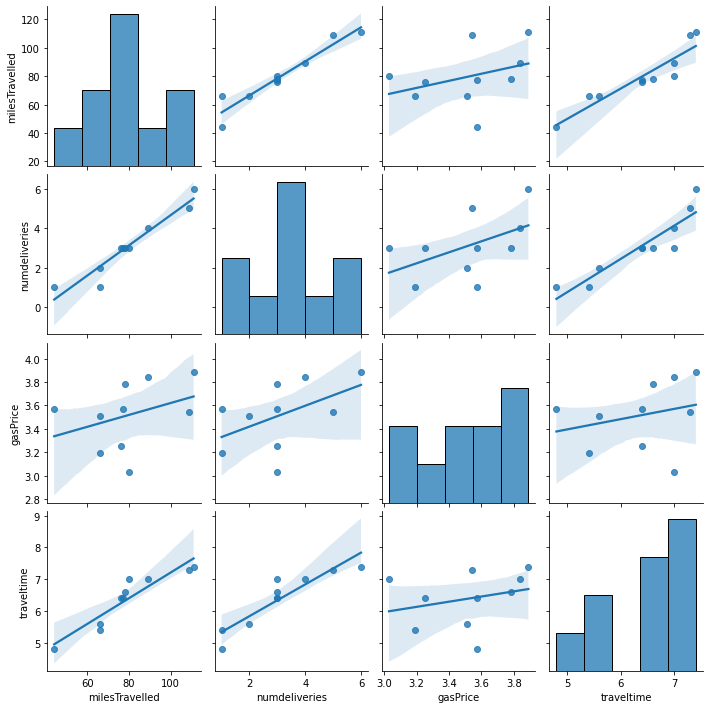

In [11]:
sns.pairplot(df, kind='reg')

In [12]:
from statsmodels.formula.api import ols

In [13]:
print(ols('traveltime ~ numdeliveries', data= df).fit().summary())                      # ordinary least square - OLS

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           0.000193
Time:                        19:17:33   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8454      0.265     18.261

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
print(ols('traveltime ~ milesTravelled', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           0.000107
Time:                        19:17:34   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1856      0.467      6.

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
print(ols('traveltime ~ gasPrice', data=df).fit().summary())                               # p-value range (less then 0.05 is good prediction)

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Sun, 04 Sep 2022   Prob (F-statistic):              0.455
Time:                        19:17:34   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5365      3.649      0.969      0.3

In [16]:
model = ols('traveltime ~ milesTravelled', data = df).fit()
model.predict(pd.DataFrame({'milesTravelled':[50, 100, 150, 200]}))

0     5.198399
1     7.211238
2     9.224077
3    11.236916
dtype: float64